BEFORE WE START...
--------------

The VM needs a patch to perform some of this analysis. Applying the patch is relatively painless. You will need to stop your VM in order to activate the patch.

Go to the [ssvm](https://github.com/FermiSummerSchool/ssvm) portion of github and follow the directions at the bottom under **Tempo2/PGPLOT patch instructions** to install the patch. 

Once that's done, you can restart your VM and run jupyter to follow along with this notebook.

Pulsar Analysis with FermiPy
===========================

Pulsars display both temporal and spectral signatures in LAT data. However, the periodicity for gamma-ray pulsars is much faster than the frequency at which photons are detected by the LAT. 

The Vela pulsar, the brightest persistent source in the LAT sky, produces (on average) one LAT event every 2.6 minutes. During that time, the pulsar has rotated ~1766 times...emitting a radio pulse each time. These radio pulses provide a signal that can be easily used to characterize the pulsar.

While 56 pulsars (55 young, and one MSP) have been discovered in the LAT gamma-ray data, the analysis required for that discovery is complex and requires significant computing power. 

* Here we will discuss what can be done with pulsars that have already been detected and characterized for timing. 
 
Once the timing solution for a pulsar has been found, it opens the door to analysis in the gamma-rays. In order to leverage this knowledge, we first need a timing model that is valid during at least part of the Fermi mission. The easiest place to look is the most recent [Pulsar Catalog](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/), which includes all the pulsar timing files that were used in the process of developing the catalog.

Overview of steps
===================

1) Perform Binned Likelihood analysis to acquire a fitted XML model file. This will take a while, depending on how much data you are analyzing.

2) Apply probabilities to the events and remove those with low probabilities. You can also weight the events by the probabiity.

3) Apply the timing model to the data and look for pulsations


Get the timing model
--------------

Download the 2PC catalog archive into your working directory and untar/zip it. For this analysis, we will be working in: 
> /home/vagrant/PSR_analysis  

In [1]:
from IPython.display import HTML

In [2]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/' width='850' height='500'></iframe>")

Once you have unzipped/untarred the archive you should find the timing files under 2PC_auxiliary_files_v04/par_files . You should look at the .par file for your source of interest to determine the validity interval for the timing solution.

In [22]:
cat SecondPulsarCatalogFIles/2PC_auxiliary_files_v04/par_files/PSRJ0007+7303_2PC_2.par

PSRJ           J0007+7303
RAJ            00:07:01.56
DECJ           73:03:08.3
F0             3.1656273496983659374  0.00000000362589170414
F1             -3.5815680310574102946e-12  2.6873539591288110219e-16
F2             8.8657070674040351073e-22  2.2520701819818733927e-23
PEPOCH         55600
POSEPOCH       55600
DMEPOCH        55600
GLEP_2         55465.649999999999999
GLPH_2         0
GLF0_2         3.9512901101121276016e-06
GLF1_2         -3.5090255812328969218e-14
START          55010.798475736919499
FINISH         55961.097272243612679
TZRMJD         55481.148395659399906744
TZRFRQ         0
TZRSITE        coe
TRES           2539.761
EPHVER         5
CLK            TT(TAI)
MODE           1
UNITS          TDB
EPHEM          DE405
NITS           1
NTOA           100
CHI2R          3.0727  79
WAVEEPOCH      55600
WAVE_OM        0.0033517327682003  0
WAVE1          1969.7662484155  -5004.6447565024
WAVE2          -3028.7565222605  3252.5253098962
WAVE3          2902.3584103003  -1

This pulsar, in the SNR CTA1, was the first to be discovered by the Fermi-LAT. 

Even though the 2PC catalog used three years of LAT data, the timing solution is only valid for 2.6 years (MJD 55010 - 55961). This is not uncommon for young pulsars, as frequent glitches require these sources to be recharacterized on a regular basis. You can see from the number of wave terms at the end of the file that this is a difficult pulsar to time.

So, instead, let's look at a pulsar that is being regularly timed by radio telescopes.

In [23]:
cat SecondPulsarCatalogFIles/2PC_auxiliary_files_v04/par_files/PSRJ0248+6021_2PC.par

PSRJ           J0248+6021
RAJ            02:48:18.6271820
DECJ           +60:21:34.92726
F0             4.6060228132407530083  1  0.00000000000296652185
F1             -1.1676372961612546569e-12  1  1.1798851346771129241e-19
F2             3.1898613815637571987e-24  1  5.617460107829222999e-27
F3             -2.874207791559120525e-32  1  5.0270445136628880472e-34
F4             1.7679367024475266472e-39  1  1.1627013748622322271e-41
PEPOCH         54000.000168324422816
POSEPOCH       54000.000168324422816
DMEPOCH        54000.000168324422816
DM             369.47966018314969219  0.01408210007430153732
DM1            0.28364834104484394758  0.00983348499993829013
PMRA           -24.836168842180075172  1.72832902680280420249
PMDEC          59.210606343041537677  2.23010128724490330754
PX             0.1
GLEP_1         54897.41
GLEP_2         53900
GLEP_3         55657  1
GLPH_3         -1.1269157593186818712  1  0.00450649843720785526
GLF0_1         3.4384114658567793291e-06  0.000000000

Much better! No wave terms means the timing model describes the data very well!

**The 2PC Catalog has a huge amount of useful information, including:**

* An overview FITS file that summarizes the content of the paper tables for each pulsar
* Timing parameter files for all the pulsars in the catalog
* Plots showing the radio and gamma-ray light curves, the best-fit gamma-ray light curve, and the gamma-ray light curves in different energy ranges
* Plots showing the results of the spectral analysis, with the best-fit model overplotted on the individual spectral points
* Individual FITS (and ascii) files for each pulsar that include the data points and errors used for:
    * all the gamma-ray light curves
    * the best-fit gamma-ray light curve
    * the radio light curve
    * the individual spectral points
    * the best-fit spectral model
    
This is an excellent archive for preparing for publications. I encourage you to take a look at the contents.

In [3]:
ls SecondPulsarCatalogFIles/2PC_auxiliary_files_v04/

2PC_catalog_v04.asc   images/                         par_files/
2PC_catalog_v04.fits  online_supplement_overview.pdf  PSR_data/


In [25]:
%system fv SecondPulsarCatalogFIles/2PC_auxiliary_files_v04/PSR_data/FITS/PSRJ0248+6021_2PC_data.fits

[]

![J0248_data](images/2PC_J0248_psr_data.png)

Get the LAT data for your pulsar
---------------------

Now we need the data for the pulsar. This pulsar is in the plane of the Galaxy (b=0.697), which means characterizing the diffuse emission will be important for our analysis. I have downloaded data for a 15-degree ROI, and matched the validity period of the timing file.

You can download the same data from this link:

https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L1706021039396DFB177F14

In [4]:
ls data

00/
bexpmap_00.fits
bexpmap_roi_00.fits
ccube_00.fits
ccube.fits
events.txt
evfile_00.txt
fermipy.log
fit1_00.xml
fit1_counts_map_2.000_5.000.png
fit1_counts_map_xproj_2.000_5.000.png
fit1_counts_map_yproj_2.000_5.000.png
fit1_counts_spectrum.png
fit1.fits
fit1_model_map_2.000_5.000.png
fit1.npy
ft1_00.fits
gtbin.par
gtexpcube2.par
gtltcube.par
gtselect.par
gtsrcmaps.par
L1706021039396DFB177F14_PH00.fits
L1706021039396DFB177F14_PH01.fits
L1706021039396DFB177F14_PH02.fits
L1706021039396DFB177F14_PH03.fits
L1706021039396DFB177F14_PH04.fits
L1706021039396DFB177F14_PH05.fits
L1706021039396DFB177F14_PH06.fits
L1706021039396DFB177F14_PH07.fits
L1706021039396DFB177F14_PH08.fits
ltcube_00.fits
PSR_J0248+6021_nogal_pointsource_powerlaw_2.00_residmap.fits
PSR_J0248+6021_nogal_pointsource_powerlaw_2.00_residmap.npy
PSR_J0248+6021_pointsource_powerlaw_2.00_residmap.fits
PSR_J0248+6021_pointsource_powerlaw_2.00_residmap.npy
PSR_J0248+6021_pointsource_powerlaw_2.00_tsmap.fits
PSR_J0248+6021_pointsou

I always record the information from my query with my data. The same information is also stored in the header of the file and can be viewed with *[gtvcut](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtvcut.txt)*.

In [5]:
cat data/query.txt

Equatorial coordinates (degrees)	(42.0777,60.3595)
Time range (MET)	(239557417,335145602)
Time range (Gregorian)	(2008-08-04 15:43:36,2011-08-16 00:00:00)
Energy range (MeV)	(100,300000)
Search radius (degrees)	15


In [28]:
ls data/*PH* > data/events.txt

In [6]:
cat data/events.txt

data/L1706021039396DFB177F14_PH00.fits
data/L1706021039396DFB177F14_PH01.fits
data/L1706021039396DFB177F14_PH02.fits
data/L1706021039396DFB177F14_PH03.fits
data/L1706021039396DFB177F14_PH04.fits
data/L1706021039396DFB177F14_PH05.fits
data/L1706021039396DFB177F14_PH06.fits
data/L1706021039396DFB177F14_PH07.fits
data/L1706021039396DFB177F14_PH08.fits


As a rule, the E-dot (spindown power) for a pulsar needs to be greater than about 10^33 for it to have a chance of being detected in the gamma rays. Below that threshold, it is speculated, there is not enough energy in the system to spawn the processes that generate gamma rays. 

![PPdot](images/P-Pdot.gif)

The first step of searching in gamma rays for a pulsar with a known radio ephemeris is to determine if that source is even a pulsed gamma-ray source. To determine that, you should extract the events associated with that pulsar...

***Your moment of Zen***

Think about the last statement. How do we know which events are related to a particular source?

Likelihood tells us which events have a higher probability of coming from our source...and which do not. You may be tempted to pull events from a small region near the known pulsar position. However, the better solution is to use all the information you have to improve your analysis. This means completing a likelihood fit prior to attempting  any timing analysis. The benefits to this approach are:

1) You determine if the source is significant enough to provide spectral information. If the pulsar isn't signiicant, then timing information is the only thing you can apply. 

2) A successful spectral fit allows you to run *[gtsrcprob](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcprob.txt)* which allows you to weight your data set to favor events that are more likely to have originated from the pulsar.

Initial Spectral Analysis
-----------------

Many energetic young radio pulsars are faint in gamma rays, likely due to geometry...the part of the magnetosphere that produces radio emission only partially overlaps with the part that produces gamma rays. The same is true for bright young gamma-ray pulsars...nearly all the new pulsars discovered in the gamma rays are completely radio quiet. 

![PSR_regions](images/PSR_emission_regions.png)

This is not the case for recycled pulsars. In pulsars with millisecond periods, the two emission regions appear to have much more overlap.

Because pulsars are often faint, they can require careful treatment for gamma-ray spectral analysis. 

The spectral fit for a faint source will be significantly affected if nearby, brighter sources are not properly modeled. This means you will need to free more parameters in your model, making the spectral fit take longer.

Let's first perform a binned analysis to characterize the sources in our ROI.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [8]:
ls

config.yaml  PSRJ0248+6021_2PC.par                sourcelist.txt
data/        Pulsar Analysis with FermiPy.ipynb   T2runtime/
images/      Pulsar Analysis with LAT Data.ipynb
old_data/    SecondPulsarCatalogFIles/


In [9]:
cat config.yaml

data:
  evfile : /home/vagrant/PSR_analysis/data/events.txt
  scfile : /home/vagrant/PSR_analysis/data/SC00.fits

binning:
  roiwidth   : 15.0
  binsz      : 0.1
  binsperdec : 8

selection :
  emin : 100
  emax : 100000
  zmax    : 90
  evclass : 128
  evtype  : 3
  tmin    : 239557417
  tmax    : 335145602
  filter  : null
  target : 'PSR J0248+6021'

gtlike:
  edisp : True
  irfs : 'P8R2_SOURCE_V6'
  edisp_disable : ['isodiff','galdiff']

model:
  src_roiwidth : 20.0
  galdiff  : '/vagrant/gll_iem_v06.fits'
  isodiff  : 'iso_P8R2_SOURCE_V6_v06.txt'
  catalogs : ['3FGL']

optimizer:
  tol : 0.01

components:
#  - { selection : { evtype : 4  } } # PSF0
#  - { selection : { evtype : 8  } } # PSF1
#  - { selection : { evtype : 16 } } # PSF2
#  - { selection : { evtype : 32 } } # PSF3

fileio:
   outdir : data


In [10]:
from fermipy.gtanalysis import GTAnalysis

Plotter is MatPlotlib


In [11]:
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})

2017-06-03 13:43:35 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.14.1 
ScienceTools version 


**Run the Analysis Setup script**

This will generate all the input data files needed for the Likeliohood fit. 

In [35]:
gta.setup()

2017-06-02 18:03:02 INFO    GTAnalysis.setup(): Running setup.
2017-06-02 18:03:02 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2017-06-02 18:03:02 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2017-06-02 18:03:02 INFO    GTBinnedAnalysis.run_gtapp(): time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtselect infile=/home/vagrant/PSR_analysis/data/evfile_00.txt outfile=/home/vagrant/PSR_analysis/data/ft1_00.fits ra=42.1469993591 dec=60.3725013733 rad=11.1066017178 tmin=239557417.0 tmax=335145602.0 emin=100.0 emax=100000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2017-06-02 18:03:30 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version ScienceTools-v10r0p5-fssc-20150518
2017-06-02 18:03:30 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) != o0) && angsep

2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0217.3+6209
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0327.4+5828c
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0241.3+6542
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0332.4+6110
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0332.0+6308
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0205.5+6448
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0302.0+5335
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0228.5+6703
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0333.9+6538
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0348.4+6039
2017-06-02 19:14:37

2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0426.3+6827....................!
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for galdiff....................!
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for isodiff....................!
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtsrcmaps. Execution time: 345.48 s
2017-06-02 19:14:37 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2017-06-02 19:14:37 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2017-06-02 19:15:05 INFO    GTAnalysis.setup(): Initializing source properties
2017-06-02 19:15:05 INFO    GTAnalysis.setup(): Finished setup.


You should quickly check your data to be sure the input files make sense

In [38]:
%system fv data/ccube.fits

[]

Good! Data is present, and binned reasonably in space and energy.

In [39]:
gta.print_roi()

2017-06-02 19:25:14 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0248.5+6022   PointSource    PLSuperExpCuto    0.000       nan      6408.6
3FGL J0240.5+6113   PointSource    LogParabola       1.301       nan     59433.7
3FGL J0254.2+5903   PointSource    PowerLaw          1.500       nan      1616.6
3FGL J0233.0+6237   PointSource    PowerLaw          2.912       nan      2207.8
3FGL J0225.8+6159   PointSource    LogParabola       3.175       nan      2992.1
3FGL J0221.1+6059   PointSource    PowerLaw          3.409       nan      2784.8
3FGL J0223.6+6204   PointSource    LogParabola       3.454       nan      4099.6
3FGL J0221.8+6138c  PointSource    PowerLaw          3.473       nan      1942.3
3FGL J0224.0+6235   PointSource    PowerLaw          3.674       nan      1851.0
3FGL J0220.1+6202c  PointSource    PowerLaw          3.8

**Optimize the RoI**

In [40]:
opt1 = gta.optimize()

2017-06-02 19:25:32 INFO    GTAnalysis.optimize(): Starting
/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/lib/python2.7/site-packages/fermipy/utils.py:734: RuntimeWarning: invalid value encountered in less
  if np.any(fn_val[imax:] < -deltalnl):
/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/lib/python2.7/site-packages/fermipy/utils.py:746: RuntimeWarning: invalid value encountered in absolute
  err_lo = np.abs(x0 - find_function_root(fn, x0, xlo, 0.5))
/usr/local/f

In [41]:
opt1

{'config': {'max_free_sources': 5,
  'npred_frac': 0.95,
  'npred_threshold': 1.0,
  'optimizer': {'init_lambda': 0.0001,
   'max_iter': 100,
   'min_fit_quality': 2,
   'optimizer': 'MINUIT',
   'retries': 3,
   'tol': 0.001,
   'verbosity': 0},
  'shape_ts_threshold': 25.0,
  'skip': []},
 'dloglike': 197.12663339765277,
 'loglike0': 234485.16975145706,
 'loglike1': 234682.2963848547}

In [42]:
gta.print_roi()

2017-06-02 20:00:49 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0248.5+6022   PointSource    PLSuperExpCuto    0.000    676.51      6331.5
3FGL J0240.5+6113   PointSource    LogParabola       1.301  52321.52     63106.7
3FGL J0254.2+5903   PointSource    PowerLaw          1.500     27.42      1497.1
3FGL J0233.0+6237   PointSource    PowerLaw          2.912     40.81      1780.3
3FGL J0225.8+6159   PointSource    LogParabola       3.175    241.52      2982.4
3FGL J0221.1+6059   PointSource    PowerLaw          3.409    115.48      3346.2
3FGL J0223.6+6204   PointSource    LogParabola       3.454    586.24      4269.0
3FGL J0221.8+6138c  PointSource    PowerLaw          3.473     27.35      1494.8
3FGL J0224.0+6235   PointSource    PowerLaw          3.674     45.43      1860.6
3FGL J0220.1+6202c  PointSource    PowerLaw          3.8

**Delete low sources**

In [43]:
deleted_sources = gta.delete_sources(minmax_ts=[-1,3])

2017-06-02 20:01:04 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0223.3+6820
2017-06-02 20:01:11 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0358.8+6002
2017-06-02 20:01:18 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0248.4+5130
2017-06-02 20:01:25 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0352.9+5655
2017-06-02 20:01:32 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0137.8+5813
2017-06-02 20:01:39 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0133.3+5930
2017-06-02 20:01:45 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0131.2+6120
2017-06-02 20:01:52 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0214.4+5143
2017-06-02 20:01:58 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0148.3+5200
2017-06-02 20:02:04 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0135.0+6927
2017-06-02 20:02:09 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0110.2+6806
2017-06-02

In [44]:
gta.print_roi()

2017-06-02 20:04:55 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0248.5+6022   PointSource    PLSuperExpCuto    0.000    676.51      6331.5
3FGL J0240.5+6113   PointSource    LogParabola       1.301  52321.52     63106.7
3FGL J0254.2+5903   PointSource    PowerLaw          1.500     27.42      1497.1
3FGL J0233.0+6237   PointSource    PowerLaw          2.912     40.81      1780.3
3FGL J0225.8+6159   PointSource    LogParabola       3.175    241.52      2982.4
3FGL J0221.1+6059   PointSource    PowerLaw          3.409    115.48      3346.2
3FGL J0223.6+6204   PointSource    LogParabola       3.454    586.24      4269.0
3FGL J0221.8+6138c  PointSource    PowerLaw          3.473     27.35      1494.8
3FGL J0224.0+6235   PointSource    PowerLaw          3.674     45.43      1860.6
3FGL J0220.1+6202c  PointSource    PowerLaw          3.8

**Prepare model file for Likelihood fit**

In [45]:
# Free Normalization of all Sources within 5 deg of ROI center
gta.free_sources(distance=5.0,pars='norm')

# Free sources with TS > 10
gta.free_sources(minmax_ts=[10,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0248.5+6022     : ['Prefactor']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0240.5+6113     : ['norm']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0254.2+5903     : ['Prefactor']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0233.0+6237     : ['Prefactor']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0225.8+6159     : ['norm']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0221.1+6059     : ['Prefactor']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0223.6+6204     : ['norm']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0221.8+6138c    : ['Prefactor']
2017-06-02 20:06:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0224.0+6235 

**Perform the Likelihood fit**

In [46]:
fit1 = gta.fit()

2017-06-02 20:07:44 INFO    GTAnalysis.fit(): Starting fit.
2017-06-02 22:32:11 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2017-06-02 22:32:11 INFO    GTAnalysis.fit(): LogLike:   234684.165 DeltaLogLike:        3.918 


In [47]:
gta.print_roi()

2017-06-02 22:46:12 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0248.5+6022   PointSource    PLSuperExpCuto    0.000    619.04      6279.6
3FGL J0240.5+6113   PointSource    LogParabola       1.301  47521.82     63269.1
3FGL J0254.2+5903   PointSource    PowerLaw          1.500     25.11      1508.6
3FGL J0233.0+6237   PointSource    PowerLaw          2.912     30.73      1612.6
3FGL J0225.8+6159   PointSource    LogParabola       3.175    234.70      3010.9
3FGL J0221.1+6059   PointSource    PowerLaw          3.409     99.64      3298.1
3FGL J0223.6+6204   PointSource    LogParabola       3.454    588.90      4367.1
3FGL J0221.8+6138c  PointSource    PowerLaw          3.473     18.07      1247.1
3FGL J0224.0+6235   PointSource    PowerLaw          3.674     41.94      1882.3
3FGL J0220.1+6202c  PointSource    PowerLaw          3.8

In [48]:
print(gta.roi['3FGL J0248.5+6022'])

Name           : 3FGL J0248.5+6022
Associations   : ['3FGL J0248.5+6022', 'PSR J0248+6021', '2FGL J0248.1+6021']
RA/DEC         :     42.147/    60.373
GLON/GLAT      :    136.928/     0.724
TS             : 619.04
Npred          : 6279.63
Flux           : 8.632e-08 +/- 4.36e-09
EnergyFlux     : 2.757e-05 +/- 1.39e-06
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  2.197e-11 +/-  1.109e-12
Index1         :     -1.893 +/-        nan
Scale          :      736.5 +/-        nan
Cutoff         :       1922 +/-        nan
Index2         :          1 +/-        nan


In [49]:
print(gta.roi['3FGL J0205.5+6448'])

Name           : 3FGL J0205.5+6448
Associations   : ['3FGL J0205.5+6448', 'PSR J0205+6449', '1FHL J0205.7+6448', '2FGL J0205.8+6448', '3C 58']
RA/DEC         :     31.396/    64.815
GLON/GLAT      :    130.718/     3.070
TS             : 1616.54
Npred          : 6382.06
Flux           : 9.401e-08 +/-  3.1e-09
EnergyFlux     : 3.348e-05 +/-  1.1e-06
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  4.059e-11 +/-  1.337e-12
Index1         :     -1.988 +/-        nan
Scale          :      509.8 +/-        nan
Cutoff         :       4126 +/-        nan
Index2         :          1 +/-        nan


In [50]:
gta.write_roi('fit1',make_plots=True)

2017-06-02 22:46:40 INFO    GTBinnedAnalysis.write_xml(): Writing /home/vagrant/PSR_analysis/data/fit1_00.xml...
2017-06-02 22:46:40 INFO    GTAnalysis.write_fits(): Writing /home/vagrant/PSR_analysis/data/fit1.fits...
2017-06-02 22:46:42 INFO    GTAnalysis.write_roi(): Writing /home/vagrant/PSR_analysis/data/fit1.npy...


**Check resulting plots**

![fit1_counts_spectrum.png](data/fit1_counts_spectrum.png)
![fit1_counts_map_2.000_5.000.png](data/fit1_counts_map_2.000_5.000.png)
![fit1_model_map_2.000_5.000.png](data/fit1_model_map_2.000_5.000.png)
![fit1_counts_map_xproj_2.000_5.000.png](data/fit1_counts_map_xproj_2.000_5.000.png)  
![fit1_counts_map_yproj_2.000_5.000.png](data/fit1_counts_map_yproj_2.000_5.000.png)

In [58]:
resid = gta.residmap('PSR_J0248+6021',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2017-06-03 11:40:24 INFO    GTAnalysis.residmap(): Generating residual maps
2017-06-03 11:40:24 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2017-06-03 11:40:28 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2017-06-03 11:40:49 INFO    GTAnalysis.residmap(): Finished residual maps


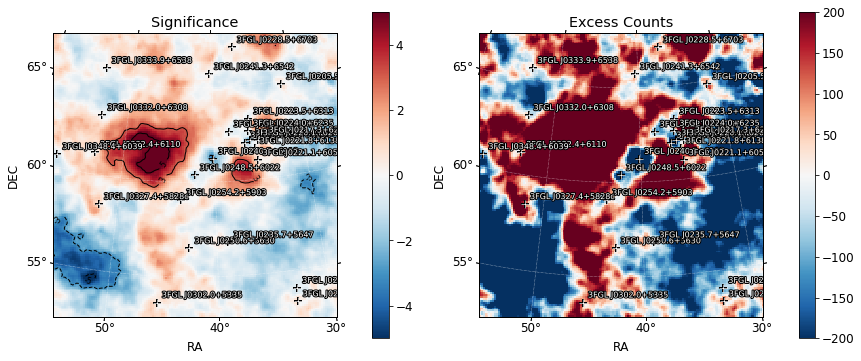

In [59]:
from fermipy.plotting import ROIPlotter
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')
plt.show()

In [60]:
tsmap = gta.tsmap('PSR_J0248+6021',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2017-06-03 11:40:51 INFO    GTAnalysis.tsmap(): Generating TS map
2017-06-03 11:41:17 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2017-06-03 11:43:06 INFO    GTAnalysis.tsmap(): Finished TS map


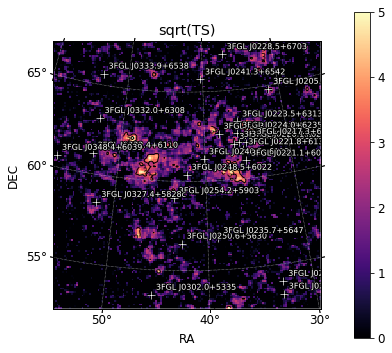

In [61]:
o = tsmap

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

In [62]:
resid_nogal = gta.residmap('PSR_J0248+6021_nogal',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['galdiff'])

2017-06-03 11:43:06 INFO    GTAnalysis.residmap(): Generating residual maps
2017-06-03 11:43:06 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2017-06-03 11:43:11 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2017-06-03 11:43:33 INFO    GTAnalysis.residmap(): Finished residual maps


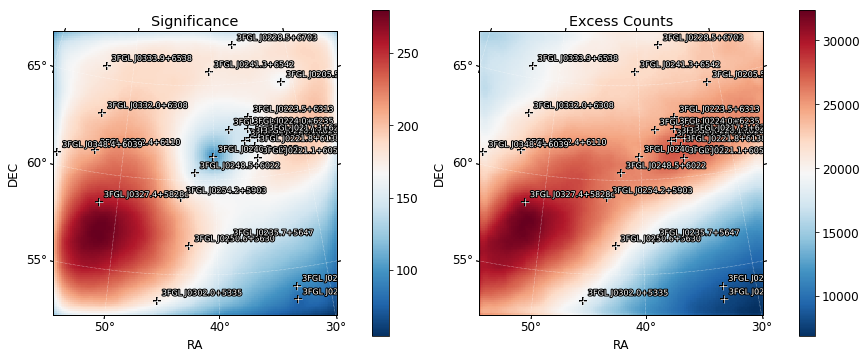

In [63]:
o = resid_nogal
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')
plt.show()

**Take a look at the spectral fit**

In [ ]:
sed = gta.sed('PSR J0248+6021')

2017-06-03 11:49:13 INFO    GTAnalysis.sed(): Computing SED for 3FGL J0248.5+6022


In [ ]:
source = gta.roi.get_source_by_name('3FGL_J0248+6022')

In [ ]:
E = np.array(source['model_flux']['energies'])
dnde = np.array(source['model_flux']['dnde'])
dnde_hi = np.array(source['model_flux']['dnde_hi'])
dnde_lo = np.array(source['model_flux']['dnde_lo'])

In [ ]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(np.array(sed['e_ctr']),
             sed['e2dnde'], 
             yerr=sed['e2dnde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [ ]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [ ]:
gta.write_roi('fit1_sed',make_plots=True)

**Iterate as needed**

If you want the process to run more quickly, you can loosen your tolerance by adding the "optimizer" parameter to your config.yaml file:

> optimizer:

> > tol : 0.01

However, that's not appropriate for a scientific result. The default tolerance is 0.001.

When you iterate, you should use the output model (fit1_00.xml) from this fit so that you are closer to the (hopefully) correct result. However, you will want to move any parameters that have hit their limits away from the limit value. 

Event Weighting
------------

Once the initial spectral analysis is complete, it is simple to run *[gtsrcprob](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcprob.txt)*. The tool generates a new file with additional columns, one for each source you specify in the *sourcelist.txt* file. It then determines, for each event, how likely it is for that event to have originated from that source, and records the fractional probability in each column. Each event should have probabilities that add up to one.

Next you can use *[ftselect](http://heasarc.gsfc.nasa.gov/lheasoft/ftools/headas/ftselect.html)* to filter out events below a particular probability threshold of your choosing. (Here I used 20%.) While this reduces the statistics for your search, it greatly improves the S/N ratio and greatly improves the chance of detecting significant pulsations.

***BE AWARE!!***
Changing the number of events using a method where the GTIs cannot be corrected, means that the resulting file is not appropriate for measuring the flux or spectral parameters of your source. We are searching for a temporal signature, so this is not a concern for us.

In [17]:
import gt_apps
from gt_apps import *
filter['infile'] = '@data/events.txt'
filter['outfile'] = 'data/J0248_3deg_z90.fits'
filter['ra'] = 42.0777
filter['dec'] = 60.3595
filter['rad'] = 3
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 300
filter['emax'] = 50000
filter['zmax'] = 90
filter['evclass'] = 128
filter.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtselect infile=@data/events.txt outfile=data/J0248_3deg_z100.fits ra=42.0777 dec=60.3595 rad=3.0 tmin="INDEF" tmax="INDEF" emin=300.0 emax=50000.0 zmin=0.0 zmax=100.0 evclass=128 evclsmin=0 evclsmax=10 evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 5.71
user 5.29
sys 0.29


In [18]:
maketime['evfile'] = 'data/J0248_3deg_z90.fits'
maketime['outfile'] = 'data/J0248_3deg_z90_gti.fits'
maketime['scfile'] = 'data/SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'yes'
maketime.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtmktime scfile=data/SC00.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=yes evfile=data/J0248_3deg_z100.fits evtable="EVENTS" outfile="data/J0248_3deg_z100_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 42.82
user 42.16
sys 0.38


In [16]:
from astropy.io import fits as pyfits
original_data = pyfits.open('data/J0248_3deg_z90_gti.fits')
original_data.info()

Filename: data/J0248_3deg_z100_gti.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      31   ()      
  1  EVENTS      BinTableHDU    220   102736R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI         BinTableHDU     46   21702R x 2C   [D, D]   


Assigning probabilities to events is an inherently **UNBINNED** process. In order to do this, you will need the diffuse responses calculated for every event in your dataset. It's best to do this on the small region since the fit is already complete.

To add the diffuse responses, we run the *[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* tool, using gtapps.

In [23]:
diffResps['evfile'] = 'data/J0248_3deg_z90_gti.fits'
diffResps['scfile'] = 'data/SC00.fits'
diffResps['srcmdl'] = 'data/fit1_00.xml'
diffResps['irfs'] = 'CALDB'
diffResps['evclass'] = 'INDEF'
diffResps['evtype'] = 'INDEF'
diffResps.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtdiffrsp evfile=data/J0248_3deg_z100_gti.fits evtable="EVENTS" scfile=data/SC00.fits sctable="SC_DATA" srcmdl=data/fit1_00.xml irfs="CALDB" evclsmin=0 evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=no debug=no gui=no mode="ql"
adding source galdiff
adding source isodiff
Working on...
data/J0248_3deg_z100_gti.fits.....................!
real 8831.19
user 8810.82
sys 15.75


*[gtsrcprob](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcprob.txt)* adds columns to your data file, rather than outputting a new, separate file. You should save a copy of the original data file before starting.

In [28]:
cp data/J0248_3deg_z90_gti.fits data/J0248_3deg_z90_gti.fits.bak

In [29]:
cat sourcelist.txt

3FGL J0248.5+6022
3FGL J0205.5+6448


In [30]:
%system gtsrcprob \
  srclist=sourcelist.txt \
  evfile=data/J0248_3deg_z90_gti.fits \
  scfile=data/SC00.fits \
  outfile=data/J0248_3deg_z90_prob.fits \
  srcmdl=data/fit1_00.xml \
  irfs=P8R2_SOURCE_V6

[]

There are many ways to use the event probabilities. The most common are:
* Hard cuts
* Event weighting

Hard cuts remove any events with less than a specified probability of being attributed to the spectral model associated with your source. Here we are selecting a hard cut of 25%. You can play with this cut to see which value you think optimizes your results.

**NOTE:** We have to edit the output FITS file (J0248_3deg_z90_prob.fits) because *[ftselect](http://heasarc.gsfc.nasa.gov/lheasoft/ftools/headas/ftselect.html)* does not recognize column names containing a "+" symbol. It also doesn't like column names that begin with a number. Frustrating!

Event weighting uses the probability value to scale the influence that each event has on the results. That may be useful for some circumstances, but you can get the same effect for pulsars by using a phase-resolved analysis.

In [25]:
%system ftselect \
  data/J0248_3deg_z90_prob.fits \
  data/J0248_3deg_z90_25percent.fits \
  'PSR_J0248p6022 > 0.25' 

['ERROR: No such device or address',
 'Task ftselect 0.0 terminating with status 6',
 'Unable to redirect prompts to the /dev/tty (at headas_stdio.c:152)']

In [31]:
downselected_data = pyfits.open('data/J0248_3deg_z90_25percent.fits')
downselected_data.info()

Filename: data/J0248_3deg_z90_25percent.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      31   ()      
  1  EVENTS      BinTableHDU    226   1740R x 25C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E, 1E, 1E]   
  2  GTI         BinTableHDU     46   21702R x 2C   [D, D]   


Apply the Timing Model
------------------

Once you have purified your event list, you can apply the radio timing model to see if there are significant gamma-ray pulsations. This is best performed in tempo2, using the user-contributed [tempo2](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/Fermi_plug_doc.pdf) plugin. 

The *tempo2* plugin does not provide any pulse search capability. It simply applies the radio timing model to the gamma-ray data, and then plots the results, including the H-test result. The tool also assigns phase values to the events in the LAT data file. 

Let's investigate what's available with tempo2:

In [32]:
%system tempo2 -h

['This program comes with ABSOLUTELY NO WARRANTY.',
 'This is free software, and you are welcome to redistribute it',
 'under conditions of GPL license.',
 '',
 '',
 'Tempo2 2017.03.1',
 '',
 'examples: tempo2 mytim.tim',
 '          tempo2 -f mypar.par mytim.tim',
 '          tempo2 -gr plk -f mypar.par mytim.tim',
 '',
 'Options: ',
 '',
 '-epoch centre     Centres the PEPOCH in the fit',
 '-f parFile        Selects parameter file',
 '-dcm dcmFile      Data covariance matrix file',
 "-gr name          Uses 'name' plugin for graphical interface",
 '-h                This help',
 '-list             Provides listing of clock corrections and residuals etc.',
 "-output name      Uses 'name' plugin for output format",
 '-pred "args"    Creates a predictive 2D Chebyshev polynomial.',
 '      args = "sitename mjd1 mjd2 freq1 freq2 ntimecoeff nfreqcoeff seg_length (s)"',
 '-polyco "args"  Creates a TEMPO1-style polyco file.',
 '                   args = "mjd1 mjd2 nspan ncoeff maxha sitename 

The tempo2 command is:

In [34]:
%system tempo2 -gr fermi -ft1 data/J0248_3deg_z90_25percent.fits -ft2 data/SC00.fits -f PSRJ0248+6021_2PC.par -phase

['This program comes with ABSOLUTELY NO WARRANTY.',
 'This is free software, and you are welcome to redistribute it',
 'under conditions of GPL license.',
 '',
 'Looking for /usr/local/share/tempo2//plugins//fermi_linux-gnu_plug.t2',
 '',
 '------------------------------------------',
 'Output interface:    fermi',
 'Author:              Lucas Guillemot',
 'Updated:             10 April 2017',
 'Version:             6.0',
 '------------------------------------------',
 '',
 'First photon date in FT1: 239580677.673995 MET (s)',
 ' Last photon date in FT1: 335141398.797179 MET (s)',
 '',
 'Adding new column PULSE_PHASE.',
 '',
 'First START date in FT2:  239557417.494176 MET (s)',
 ' Last START date in FT2:  335144326.600000 MET (s)',
 '',
 'Treating events # 1 to 1740... ',
 'Done with J0248+6021']

![J0248_tempo2_out.png](images/J0248_tempo2_out.png)

As you can see, the H-test for this source is about 350. Anything over 25 is considered a detection.

![PSRJ0248+6021_2PC_LC.png](SecondPulsarCatalogFIles/2PC_auxiliary_files_v04/images/lightcurves/PNG/PSRJ0248+6021_2PC_LC.png)

Divide up Data by Phase
------------------

You can now separate your dataset into two parts, the ON-pulse or OFF-pulse phases. Take a look at the divided data to see how effective the split is at removing the pulsar.

In [42]:
%system punlearn gtselect

[]

In [45]:
filter['infile'] = '@data/events.txt'
filter['outfile'] = 'data/J0248_all_z90.fits'
filter['ra'] = 'INDEF'
filter['dec'] = 'INDEF'
filter['rad'] = 'INDEF'
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 300
filter['emax'] = 50000
filter['zmax'] = 90
filter['evclass'] = 128
filter['phasemin'] = 0
filter['phasemax'] = 1
filter.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtselect infile=@data/events.txt outfile=data/J0248_all_z90.fits ra="INDEF" dec="INDEF" rad="INDEF" tmin="INDEF" tmax="INDEF" emin=300.0 emax=50000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 23.03
user 20.78
sys 0.94


In [47]:
maketime['evfile'] = 'data/J0248_all_z90.fits'
maketime['outfile'] = 'data/J0248_all_z90_gti.fits'
maketime['scfile'] = 'data/SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'yes'
maketime.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtmktime scfile=data/SC00.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=yes evfile=data/J0248_all_z90.fits evtable="EVENTS" outfile="data/J0248_all_z90_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 24.04
user 22.95
sys 0.50


In [49]:
%system tempo2 -gr fermi -ft1 data/J0248_all_z90_gti.fits -ft2 data/SC00.fits -f PSRJ0248+6021_2PC.par -phase

['This program comes with ABSOLUTELY NO WARRANTY.',
 'This is free software, and you are welcome to redistribute it',
 'under conditions of GPL license.',
 '',
 'Looking for /usr/local/share/tempo2//plugins//fermi_linux-gnu_plug.t2',
 '',
 '------------------------------------------',
 'Output interface:    fermi',
 'Author:              Lucas Guillemot',
 'Updated:             10 April 2017',
 'Version:             6.0',
 '------------------------------------------',
 '',
 'First photon date in FT1: 239557525.705004 MET (s)',
 ' Last photon date in FT1: 335141747.874831 MET (s)',
 '',
 'Adding new column PULSE_PHASE.',
 '',
 'First START date in FT2:  239557417.494176 MET (s)',
 ' Last START date in FT2:  335144326.600000 MET (s)',
 '',
 'WARNING: large FT1 file, turning off graphical output.',
 'Treating events # 1 to 10000... ',
 'Treating events # 10001 to 20000... ',
 'Treating events # 20001 to 30000... ',
 'Treating events # 30001 to 40000... ',
 'Treating events # 40001 to 5000

In [50]:
filter['infile'] = 'data/J0248_all_z90_gti.fits'
filter['outfile'] = 'data/J0248_ONpulse_z90.fits'
filter['ra'] = 'INDEF'
filter['dec'] = 'INDEF'
filter['rad'] = 'INDEF'
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 300
filter['emax'] = 50000
filter['zmax'] = 90
filter['evclass'] = 128
filter['phasemin'] = 0.3
filter['phasemax'] = 0.5
filter.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtselect infile=data/J0248_all_z90_gti.fits outfile=data/J0248_ONpulse_z90.fits ra="INDEF" dec="INDEF" rad="INDEF" tmin="INDEF" tmax="INDEF" emin=300.0 emax=50000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype="INDEF" convtype=-1 phasemin=0.3 phasemax=0.5 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 1.66
user 1.16
sys 0.11


In [64]:
onpulse_data = pyfits.open('data/J0248_ONpulse_z90.fits')
onpulse_data.info()

Filename: data/J0248_ONpulse_z90.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      36   ()      
  1  EVENTS      BinTableHDU    236   139814R x 24C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E, 1D]   
  2  GTI         BinTableHDU     46   15564R x 2C   [D, D]   


In [53]:
counts_map['evfile'] = 'data/J0248_ONpulse_z90.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = 'data/J0248_ONpulse_z90_cmap.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 42.0777
counts_map['yref'] = 60.3595
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 300
counts_map['nypix'] = 300
counts_map['binsz'] = 0.1
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtbin evfile=data/J0248_ONpulse_z90.fits scfile=NONE outfile=data/J0248_ONpulse_z90_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=300 nypix=300 binsz=0.1 coordsys="CEL" xref=42.0777 yref=60.3595 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v10r0p5-fssc-20150518
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.41
user 0.36
sys 0.04


Because the OFF-pulse data are in two segments, we have to filter them using ftselect.

However, remember that when running a new spectral analysis, you cannot combine the resulting files. This means that you will need fermipy to treat the two different phase cuts as separate components.

In [61]:
%system ftselect 'data/J0248_all_z90_gti.fits[events]' data/J0248_OFFpulse_z90.fits '(PULSE_PHASE > 0 && PULSE_PHASE < 0.25) || (PULSE_PHASE > 0.6 && PULSE_PHASE < 1)'

['ERROR: No such device or address',
 'Task ftselect 0.0 terminating with status 6',
 'Unable to redirect prompts to the /dev/tty (at headas_stdio.c:152)']

In [65]:
offpulse_data = pyfits.open('data/J0248_OFFpulse_z90.fits')
offpulse_data.info()

Filename: data/J0248_OFFpulse_z90.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      36   ()      
  1  EVENTS      BinTableHDU    224   450838R x 24C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E, 1D]   
  2  GTI         BinTableHDU     46   15564R x 2C   [D, D]   


In [63]:
counts_map['evfile'] = 'data/J0248_OFFpulse_z90.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = 'data/J0248_OFFpulse_z90_cmap.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 42.0777
counts_map['yref'] = 60.3595
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 300
counts_map['nypix'] = 300
counts_map['binsz'] = 0.1
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtbin evfile=data/J0248_OFFpulse_z90.fits scfile=NONE outfile=data/J0248_OFFpulse_z90_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=300 nypix=300 binsz=0.1 coordsys="CEL" xref=42.0777 yref=60.3595 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v10r0p5-fssc-20150518
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.85
user 0.79
sys 0.05


__ON-Pulse__
![ON-pulse](images/J0248_ONpulse.png)
__OFF-Pulse__
![OFF-pulse](images/J0248_OFFpulse.png)

Phase-Resolved Analysis
------------------

Your next step is probably a spectral analysis using either only the ON-pulse or OFF-pulse events. Once you have a PULSE_PHASE column in your events file, fermipy provides an easy method to analyze data by phase range.

For a single-peaked pulsar like this one, you can add the ***phasemin*** and ***phasemax*** parameters to the ***selection*** portion of your config.yaml file. 

(I renamed my config.yaml to config_ON.yaml and config_OFF for this purpose. I also created new data files to contain the new data files.)

In [71]:
cat config_ON.yaml

data:

  evfile : /home/vagrant/PSR_analysis/data_ON/J0248_ONpulse_z90.fits
  scfile : /home/vagrant/PSR_analysis/data/SC00.fits

binning:
  roiwidth   : 15.0
  binsz      : 0.1
  binsperdec : 8

selection :
  emin : 100
  emax : 100000
  zmax    : 90
  evclass : 128
  evtype  : 3
  tmin    : 239557417
  tmax    : 335145602
  filter  : null
  target : 'PSR J0248+6021'
  phasemin : 0.3
  phasemax : 0.5

gtlike:
  edisp : True
  irfs : 'P8R2_SOURCE_V6'
  edisp_disable : ['isodiff','galdiff']

model:
  src_roiwidth : 20.0
  galdiff  : '/vagrant/gll_iem_v06.fits'
  isodiff  : 'iso_P8R2_SOURCE_V6_v06.txt'
  catalogs : ['3FGL']

optimizer:
  tol : 0.01

fileio:
   outdir : data_ON


If you have a multi-peaked pulsar, or to analyze the OFF-pulse region, you will need to analyze multiple components at the same time. To do this, I moved the ***selection*** information into the ***components*** area of my config_OFF.yaml file.

In [72]:
cat config_OFF.yaml

data:
  evfile : /home/vagrant/PSR_analysis/data_OFF/J0248_OFFpulse_z90.fits
  scfile : /home/vagrant/PSR_analysis/data/SC00.fits

binning:
  roiwidth   : 15.0
  binsz      : 0.1
  binsperdec : 8

selection :
  emin : 100
  emax : 100000
  zmax    : 90
  evclass : 128
  evtype  : 3
  tmin    : 239557417
  tmax    : 335145602
  filter  : null
  target : 'PSR J0248+6021'

gtlike:
  edisp : True
  irfs : 'P8R2_SOURCE_V6'
  edisp_disable : ['isodiff','galdiff']

model:
  src_roiwidth : 20.0
  galdiff  : '/vagrant/gll_iem_v06.fits'
  isodiff  : 'iso_P8R2_SOURCE_V6_v06.txt'
  catalogs : ['3FGL']

optimizer:
  tol : 0.01

components:
#  - { selection : { phasemin : 0.0, phasemax : 0.25 } } # off-pulse 1
#  - { selection : { phasemin : 0.6, phasemax : 1.0 } } # off-pulse 2

fileio:
   outdir : data_OFF


Then you run a spectral fit as above, but with the portion of the data that you are interested in. 

ON-Pulse
--------

In [73]:
gta_ON = GTAnalysis('config_ON.yaml',logging={'verbosity' : 3})

2017-06-03 17:38:36 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.14.1 
ScienceTools version 


In [74]:
gta_ON.setup()

2017-06-03 17:38:48 INFO    GTAnalysis.setup(): Running setup.
2017-06-03 17:38:48 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2017-06-03 17:38:48 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2017-06-03 17:38:48 INFO    GTBinnedAnalysis.run_gtapp(): time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtselect infile=/home/vagrant/PSR_analysis/data_ON/J0248_ONpulse_z90.fits outfile=/home/vagrant/PSR_analysis/data_ON/ft1_00.fits ra=42.1469993591 dec=60.3725013733 rad=11.1066017178 tmin=239557417.0 tmax=335145602.0 emin=100.0 emax=100000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.3 phasemax=0.5 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2017-06-03 17:38:49 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version ScienceTools-v10r0p5-fssc-20150518
2017-06-03 17:38:49 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) !

KeyboardInterrupt: 

In [ ]:
opt2_ON = gta_ON.optimize()

In [ ]:
gta_ON.print_roi()

In [ ]:
deleted_sources_ON = gta_ON.delete_sources(minmax_ts=[-1,1])

In [ ]:
gta_ON.print_roi()

In [ ]:
# Free Normalization of all Sources within 3 deg of ROI center
gta_ON.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 10
gta_ON.free_sources(minmax_ts=[10,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta_ON.free_source('galdiff')
gta_ON.free_source('isodiff')

In [ ]:
fit2_ON = gta_ON.fit()

In [ ]:
gta_ON.print_roi()

In [ ]:
print(gta_ON.roi['3FGL J0248.5+6022'])

An SED of the on-pulse data should give you the best information for the pulsar itself:

In [ ]:
sed_ON = gta_ON.sed('PSR J0248+6021')

In [ ]:
PSR_ON = gta_ON.roi.get_source_by_name('3FGL J0248+6022')

In [ ]:
E = np.array(PSR_ON['model_flux']['energies'])
dnde = np.array(PSR_ON['model_flux']['dnde'])
dnde_hi = np.array(PSR_ON['model_flux']['dnde_hi'])
dnde_lo = np.array(PSR_ON['model_flux']['dnde_lo'])

In [ ]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(np.array(sed['e_ctr']),
             sed['e2dnde'], 
             yerr=sed['e2dnde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [ ]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [ ]:
gta_ON.write_roi('fit2_ON_sed',make_plots=True)

Compare this output SED with the previous one to see how removing the off-pulse emission and reducing the influence of the other sources has improved the fit.

OFF-Pulse
--------

An OFF-pulse analysis make it possible to analyze faint sources near a bright pulsar by using the timing information to effectively turn the pulsar off. 

In [ ]:
gta_OFF = GTAnalysis('config_OFF.yaml',logging={'verbosity' : 3})

In [ ]:
gta_OFF.setup()

In [ ]:
opt3_OFF = gta_OFF.optimize()

In [ ]:
gta_OFF.print_roi()

In [ ]:
deleted_sources_OFF = gta_OFF.delete_sources(minmax_ts=[-1,1])

In [ ]:
gta_OFF.print_roi()

In [ ]:
# Free Normalization of all Sources within 3 deg of ROI center
gta_OFF.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 10
gta_OFF.free_sources(minmax_ts=[10,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta_OFF.free_source('galdiff')
gta_OFF.free_source('isodiff')

In [ ]:
fit3_OFF = gta_OFF.fit()

In [ ]:
gta_OFF.print_roi()

In [ ]:
print(gta_OFF.roi['3FGL J0248.5+6022'])

Yup, there's not much left of the pulsar!

Now let's compare the results from the nearby bright source to the original analaysis...

In [ ]:
print(gta.roi['3FGL J0240.5+6113'])

In [ ]:
print(gta_OFF.roi['3FGL J0240.5+6113'])

This source's OFF-pulse result looks different from the previous fit. This is because the Likelihood analysis does not take the phase cut into account. You will need to manually scale the output by the fraction of data that was removed to get the real value for the fit.

In this case, the OFF-pulse was 0.0 - 0.25 and 0.6 - 1.0, or 65% of the full dataset. this means you need to multiply the resulting values by 100/65, or ~1.54, to get the equivalent full flux for this source.

Phase-Resolved Light Curves
----------

If you want to do a lightcurve of the pulsar's ON-pulse contribution, or of a source in the OFF-pulse data, you should do the phase-resolved spectral fit first and use the resulting object to generate your lightcurve.